In [13]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [14]:
stock = ["AAPL", "XPEV", "TSLA", "GOOGL", "INTC", "MSFT"]

stocks = yf.download(stock, start="2010-01-01", end="2020-12-08", auto_adjust=True)
data = stocks.loc[:, "Close"].copy()

[*********************100%***********************]  6 of 6 completed


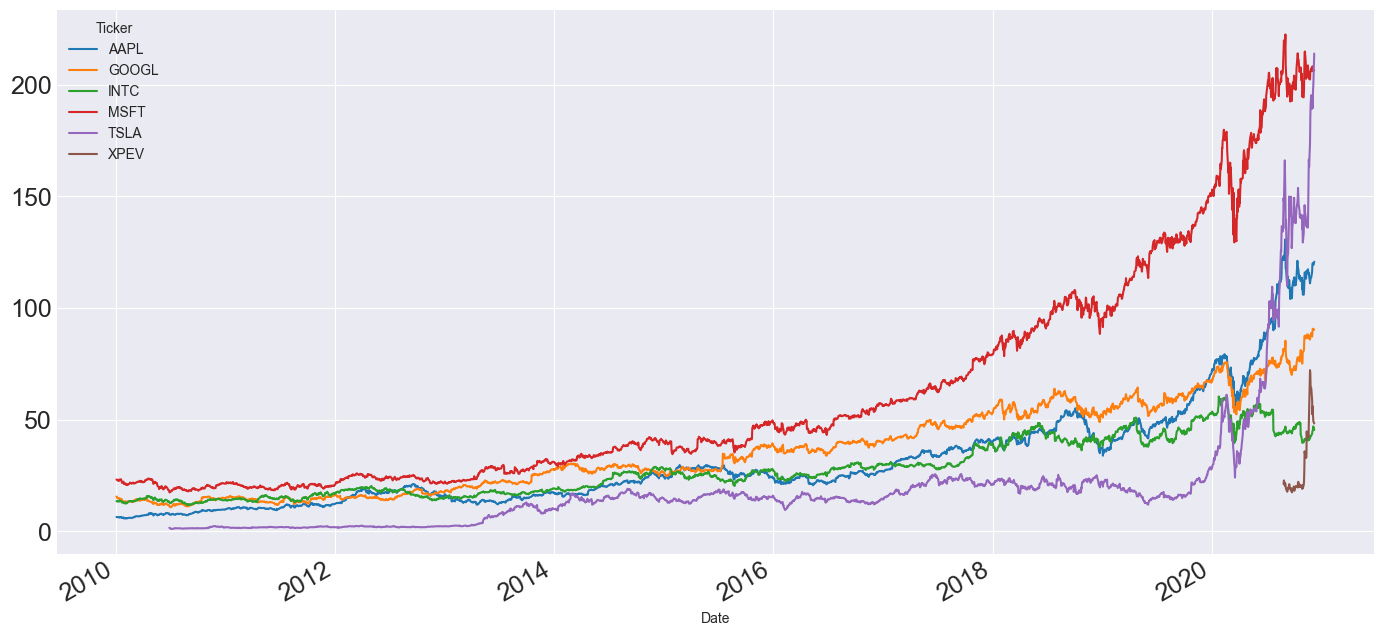

In [15]:
data.plot(figsize = (17, 8), fontsize = 18)
plt.style.use("seaborn-v0_8-darkgrid")
plt.show()

In [16]:
data.head()

Ticker,AAPL,GOOGL,INTC,MSFT,TSLA,XPEV
Date,,,,,,
2010-01-04,6.431895,15.590930,13.519423,23.211439,NaN,NaN
2010-01-05,6.443017,15.522272,13.512954,23.218945,NaN,NaN
2010-01-06,6.340531,15.130977,13.467628,23.076443,NaN,NaN
2010-01-07,6.328809,14.778734,13.338132,22.836456,NaN,NaN
2010-01-08,6.370885,14.975752,13.487055,22.993952,NaN,NaN


In [17]:
data.pct_change()

Ticker,AAPL,GOOGL,INTC,MSFT,TSLA,XPEV
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001729,-0.004404,-0.000479,0.000323,NaN,NaN
2010-01-06,-0.015907,-0.025209,-0.003354,-0.006137,NaN,NaN
2010-01-07,-0.001849,-0.023280,-0.009615,-0.010400,NaN,NaN
2010-01-08,0.006648,0.013331,0.011165,0.006897,NaN,NaN
...,...,...,...,...,...,...
2020-12-01,0.030827,0.023347,0.025026,0.009997,0.030233,-0.108918
2020-12-02,0.002933,0.016492,0.006860,-0.003885,-0.027259,0.069519
2020-12-03,-0.001137,-0.001715,0.021844,-0.005247,0.043177,-0.074643


In [18]:
com = data.pct_change().dropna()
com.describe()

Ticker,AAPL,GOOGL,INTC,MSFT,TSLA,XPEV
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.000234,0.001773,0.000545,-0.000548,0.006568,0.015521
std,0.026677,0.020464,0.020433,0.020620,0.052820,0.091445
min,-0.080061,-0.055089,-0.105751,-0.061947,-0.210628,-0.108918
25%,-0.012694,-0.010692,-0.006181,-0.010852,-0.020185,-0.039008
50%,0.000253,0.003316,0.005114,0.000629,0.009687,-0.013381
75%,0.015625,0.015436,0.013075,0.010618,0.032634,0.060804
max,0.063520,0.060881,0.029836,0.048249,0.125832,0.339209


In [19]:
sum = com.describe().T.loc[:, ["mean", "std"]]
sum

,mean,std
Ticker,,
AAPL,0.000234,0.026677
GOOGL,0.001773,0.020464
INTC,0.000545,0.020433
MSFT,-0.000548,0.020620
TSLA,0.006568,0.052820
XPEV,0.015521,0.091445


In [20]:
sum["mean"] = sum["mean"] * 252
sum["std`"] = sum["std"] * np.sqrt(252)
sum

,mean,std,std`
Ticker,,,
AAPL,0.058933,0.026677,0.423482
GOOGL,0.446763,0.020464,0.324850
INTC,0.137439,0.020433,0.324368
MSFT,-0.138022,0.020620,0.327325
TSLA,1.655126,0.052820,0.838496
XPEV,3.911227,0.091445,1.451647


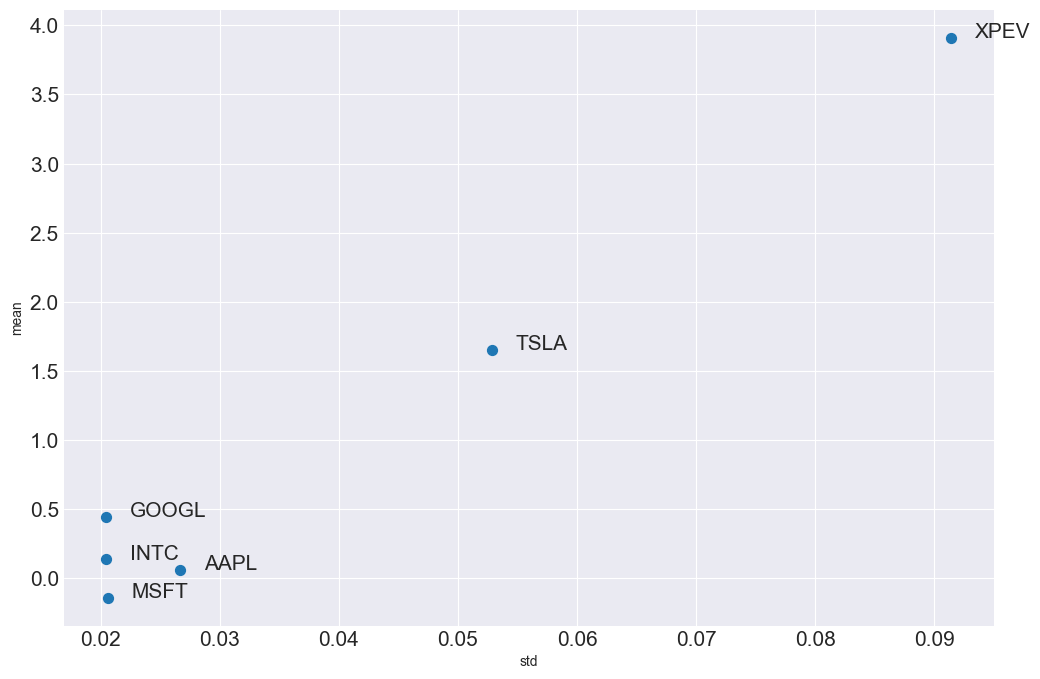

In [21]:
sum.plot.scatter(x = "std", y = "mean", figsize = (12,8), s = 50, fontsize = 15)
for i in sum.index:
    plt.annotate(i, xy=(sum.loc[i, "std"]+0.002, sum.loc[i, "mean"]+0.002), size = 15)

In [22]:
data.iloc[0]


Ticker
AAPL      6.431895
GOOGL    15.590930
INTC     13.519423
MSFT     23.211439
TSLA           NaN
XPEV           NaN
Name: 2010-01-04 00:00:00, dtype: float64

In [23]:
data.div(data.iloc[0]).mul(100)

Ticker,AAPL,GOOGL,INTC,MSFT,TSLA,XPEV
Date,,,,,,
2010-01-04,100.000000,100.000000,100.000000,100.000000,NaN,NaN
2010-01-05,100.172930,99.559629,99.952145,100.032335,NaN,NaN
2010-01-06,98.579518,97.049866,99.616877,99.418406,NaN,NaN
2010-01-07,98.397276,94.790588,98.659029,98.384491,NaN,NaN
2010-01-08,99.051455,96.054256,99.760577,99.063017,NaN,NaN
...,...,...,...,...,...,...
2020-12-01,1861.249119,572.338158,331.400946,896.937330,NaN,NaN
2020-12-02,1866.708875,581.777392,333.674512,893.452612,NaN,NaN
2020-12-03,1864.585847,580.779660,340.963180,888.765016,NaN,NaN


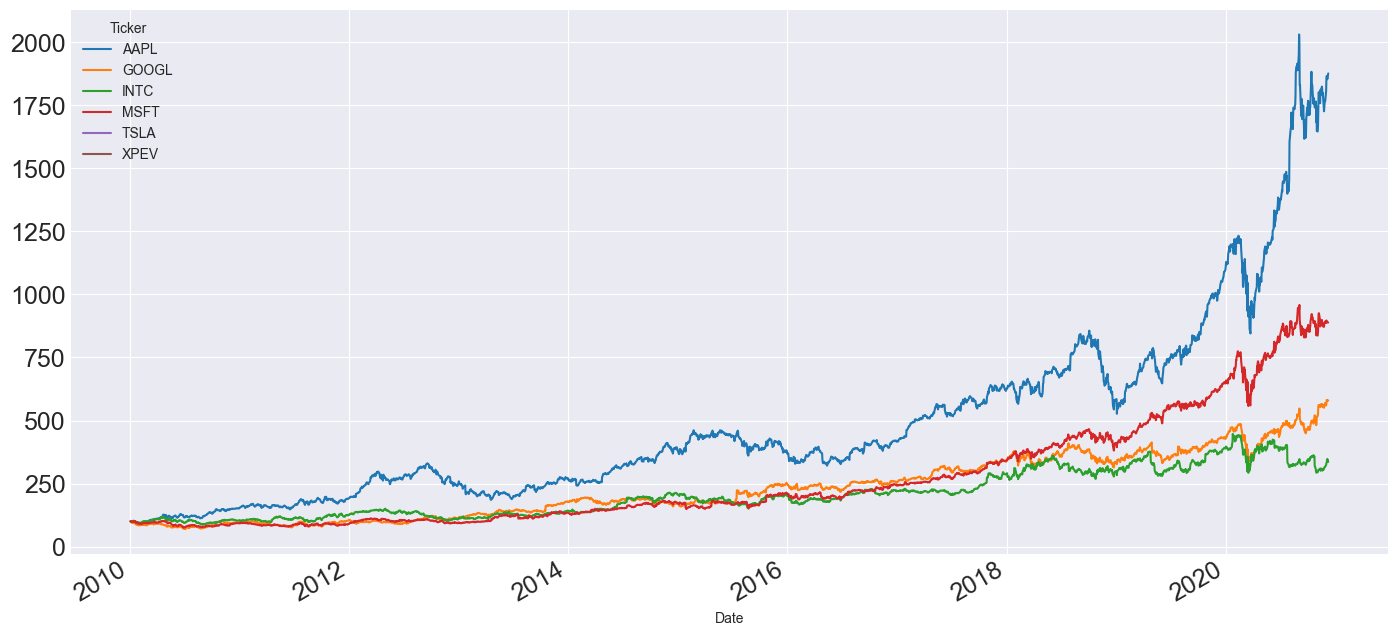

In [12]:
normData = data.div(data.iloc[0]).mul(100)
normData.plot(figsize = (17, 8), fontsize = 18)
plt.style.use("seaborn-v0_8-darkgrid")
plt.show()
